In [ ]:
## Ecrit par Redouane Lguensat
## pour Alfihrya Academy
## Juin 2020

# Exercices (Cours Part1)

## First exercise
<p dir="rtl">
تمرين 1
</p>

In [ ]:
import numpy as np
import math

In [ ]:
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [ ]:
sigmoid(0.55*0.5+(-0.35)*0.45+0.15)

0.5664790559676278

## Second exercise
<p dir="rtl">
تمرين 2
</p>

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

<p dir="rtl">
اجي نكتبو هاذ الشبكة العصبونية بKeras
</p>


![Texte alternatif…](https://cs231n.github.io/assets/nn1/neural_net2.jpeg)


In [ ]:
model = Sequential()
model.add(Dense(4, activation='relu', input_shape=(3,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(1))

<p dir="rtl">
هاد الشبكة شحال فيها من  parameters؟
</p>

In [ ]:
4*3+4+4*4+4+4*1+1

41

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 16        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


# Tutoriel MNIST (Course Part2)

In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop, Adam
import matplotlib.pyplot as plt

charger la base de données MNIST

In [ ]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


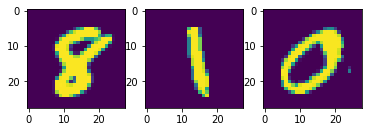

In [ ]:
randindices=np.random.randint(x_train.shape[0],size=3)
plt.figure()
plt.subplot(1,3,1)
plt.imshow(x_train[randindices[0],:,:])
plt.subplot(1,3,2)
plt.imshow(x_train[randindices[1],:,:])
plt.subplot(1,3,3)
plt.imshow(x_train[randindices[2],:,:])

In [ ]:
print(y_train[randindices[0]],y_train[randindices[1]],y_train[randindices[2]])

8 1 0


In [ ]:
x_train[randindices[0],:,:]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         31, 131, 174, 254, 254, 254, 188,  40,   0,   0,   0,   0,   0,
          0,   0],
       [  

Aplatir les images et normalisation

In [ ]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


convertir les classes en vecteurs binaires (categorical)

In [ ]:
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## entraînement d'un MLP

In [ ]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_11 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_12 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 10)               

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=1e-3),
              metrics=['accuracy'])

In [ ]:
batch_size = 128
epochs = 20

In [ ]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 134us/step - loss: 0.3509 - accuracy: 0.8940 - val_loss: 0.1251 - val_accuracy: 0.9603
Epoch 2/20
60000/60000 [==============================] - 8s 132us/step - loss: 0.1465 - accuracy: 0.9567 - val_loss: 0.0897 - val_accuracy: 0.9722
Epoch 3/20
60000/60000 [==============================] - 8s 131us/step - loss: 0.1065 - accuracy: 0.9688 - val_loss: 0.1022 - val_accuracy: 0.9678
Epoch 4/20
60000/60000 [==============================] - 8s 130us/step - loss: 0.0894 - accuracy: 0.9730 - val_loss: 0.0707 - val_accuracy: 0.9784
Epoch 5/20
60000/60000 [==============================] - 8s 134us/step - loss: 0.0769 - accuracy: 0.9765 - val_loss: 0.0716 - val_accuracy: 0.9788
Epoch 6/20
60000/60000 [==============================] - 8s 130us/step - loss: 0.0654 - accuracy: 0.9804 - val_loss: 0.0701 - val_accuracy: 0.9799
Epoch 7/20
60000/60000 [==============================] - 8s 1

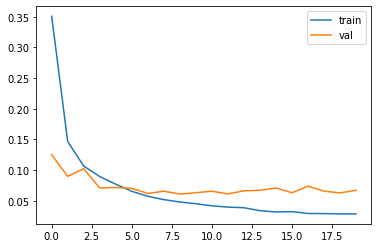

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()

score sur toute la base de données de test

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.06699622124313614
Test accuracy: 0.9843000173568726


regardons le résultat sur quelques images de test

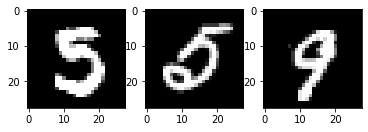

In [ ]:
randindices=np.random.randint(x_test.shape[0],size=3)
plt.figure()
plt.subplot(1,3,1)
plt.imshow(np.reshape(x_test[randindices[0],:],(28,28)), cmap='gray')
plt.subplot(1,3,2)
plt.imshow(np.reshape(x_test[randindices[1],:],(28,28)), cmap='gray')
plt.subplot(1,3,3)
plt.imshow(np.reshape(x_test[randindices[2],:],(28,28)), cmap='gray')

In [ ]:
predictions=model.predict(x_test)
print("Le réseau reconnaît le chiffre "+ str(np.argmax(predictions[randindices[0],:])) + ' avec une confiance ' + str(np.max(predictions[randindices[0],:]) * 100) + '%.')
print("Le réseau reconnaît le chiffre "+ str(np.argmax(predictions[randindices[1],:])) + ' avec une confiance ' + str(np.max(predictions[randindices[1],:]) * 100) + '%.')
print("Le réseau reconnaît le chiffre "+ str(np.argmax(predictions[randindices[2],:])) + ' avec une confiance ' + str(np.max(predictions[randindices[2],:]) * 100) + '%.')

Le réseau reconnaît le chiffre 5 avec une confiance 99.99990463256836%.
Le réseau reconnaît le chiffre 0 avec une confiance 55.70092797279358%.
Le réseau reconnaît le chiffre 9 avec une confiance 100.0%.
